# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('C:\\Users\\Akashraj D S\\Downloads\\6_Donors_choose_NB-20201029T024307Z-001\\6_Donors_choose_NB\\preprocessed_data.csv',nrows=100000)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
y=data['project_is_approved'].values
x=data.drop(['project_is_approved'],axis=1)
x.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,stratify=y)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(67000, 8) (67000,)
(33000, 8) (33000,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm


BOW = CountVectorizer(min_df=10,ngram_range=(1,1),stop_words='english')
BOW.fit(x_train['essay'].values)
x_train_bow = BOW.transform(x_train['essay'].values)
x_test_bow = BOW.transform(x_test['essay'].values)

print(x_train.shape,x_train_bow.shape)
print(x_test.shape,x_test_bow.shape)

(67000, 8) (67000, 13508)
(33000, 8) (33000, 13508)


In [5]:
print(BOW.get_feature_names())

['00', '000', '00pm', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '10th', '11', '110', '1100', '115', '11th', '12', '120', '1200', '123', '125', '12th', '13', '130', '1300', '13th', '14', '140', '1400', '145', '14th', '15', '150', '1500', '15th', '16', '160', '1600', '165', '17', '170', '1700', '175', '17th', '18', '180', '1800', '19', '190', '1950', '1950s', '1960', '1960s', '1980', '1988', '1990', '1992', '1999', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '20th', '21', '21st', '22', '220', '225', '23', '24', '240', '25', '250', '26', '260', '27', '270', '275', '28', '280', '29', '2d', '2nd', '2s', '30', '300', '3000', '30pm', '31', '3120', '32', '320', '33', '330', '34', '340', '35', '350', '36', '360', '365', '37', '375', '38', '380', '39', '3d', '3doodle', '3doodler', '3doodlers', '3rd', '40', '400', '4000', '41

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding Categorical Features (using CountVectorizer)

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [6]:
x_train['teacher_prefix'].value_counts()

mrs        35056
ms         24021
mr          6452
teacher     1463
dr             8
Name: teacher_prefix, dtype: int64

In [7]:
k=[]
#state
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values)

x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)
k.append(vectorizer.get_feature_names())

print("After Vectorization, School State")
print(x_train_state_ohe.shape,y_train.shape)
print(x_test_state_ohe.shape,y_test.shape)

#teacher_prefix
vectorizer.fit(x_train['teacher_prefix'].values)
x_train_teacher_prefix_ohe = vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix_ohe = vectorizer.transform(x_test['teacher_prefix'].values)
k.append(vectorizer.get_feature_names())

print("After Vectorization, teacher_prefix")
print(x_train_teacher_prefix_ohe.shape,y_train)
print(x_test_teacher_prefix_ohe.shape,y_test)

#project_grade_category
vectorizer.fit(x_train['project_grade_category'].values)
x_train_project_grade_category_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_test_project_grade_category_ohe = vectorizer.transform(x_test['project_grade_category'].values)
k.append(vectorizer.get_feature_names())

print("After Vectorization, project_grade_category")
print(x_train_project_grade_category_ohe.shape,y_train.shape)
print(x_test_project_grade_category_ohe.shape,y_test.shape)

#clean_categories
vectorizer.fit(x_train['clean_categories'].values)
x_train_clean_categories_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_test_clean_categories_ohe = vectorizer.transform(x_test['clean_categories'].values)
k.append(vectorizer.get_feature_names())

print("After Vectorization, clean_categories")
print(x_train_clean_categories_ohe.shape,y_train.shape)
print(x_test_clean_categories_ohe.shape,y_test.shape)

#clean_sub_categories
vectorizer.fit(x_train['clean_subcategories'].values)
x_train_clean_subcategories_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_clean_subcategories_ohe = vectorizer.transform(x_test['clean_subcategories'].values)
k.append(vectorizer.get_feature_names())

print("After Vectorization, clean_subcategories")
print(x_train_clean_subcategories_ohe.shape,y_train.shape)
print(x_test_clean_subcategories_ohe.shape,y_test.shape)




After Vectorization, School State
(67000, 51) (67000,)
(33000, 51) (33000,)
After Vectorization, teacher_prefix
(67000, 5) [1 0 0 ... 0 0 1]
(33000, 5) [1 1 0 ... 1 1 0]
After Vectorization, project_grade_category
(67000, 4) (67000,)
(33000, 4) (33000,)
After Vectorization, clean_categories
(67000, 9) (67000,)
(33000, 9) (33000,)
After Vectorization, clean_subcategories
(67000, 30) (67000,)
(33000, 30) (33000,)


In [8]:
k=sum(k,[])
print(len(k))
print(type(k))

99
<class 'list'>


### Encoding Numerical Features (Using Normalizer)

In [9]:
from sklearn.preprocessing import Normalizer

#price
normalizer = Normalizer()
normalizer.fit(x_train['price'].values.reshape(1,-1))

x_train_price_normalized = normalizer.transform(x_train['price'].values.reshape(1,-1)).reshape(-1,1)
x_test_price_normalized = normalizer.transform(x_test['price'].values.reshape(1,-1)).reshape(-1,1)

print(x_train_price_normalized.shape)
print(x_test_price_normalized.shape)

#teacher_number_of_previously_posted_projects
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_teacher_number_of_previously_posted_projects_normalized = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
x_test_teacher_number_of_previously_posted_projects_normalized = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

print(x_train_teacher_number_of_previously_posted_projects_normalized.shape)
print(x_test_teacher_number_of_previously_posted_projects_normalized.shape)

(67000, 1)
(33000, 1)
(67000, 1)
(33000, 1)


In [10]:

k.append('price')
k.append('teacher_number_of_previously_posted_projects')


In [11]:
print(len(k))

101


### Creating X_Train, X_Test based on encoded values

In [12]:
from scipy.sparse import hstack

X_Train = hstack((x_train_bow,
                  x_train_state_ohe,
                  x_train_teacher_prefix_ohe,
                  x_train_project_grade_category_ohe,
                  x_train_clean_categories_ohe,
                  x_train_clean_subcategories_ohe,
                  x_train_price_normalized,
                  x_train_teacher_number_of_previously_posted_projects_normalized)).tocsr()

X_Test = hstack((x_test_bow,
                  x_test_state_ohe,
                  x_test_teacher_prefix_ohe,
                  x_test_project_grade_category_ohe,
                  x_test_clean_categories_ohe,
                  x_test_clean_subcategories_ohe,
                  x_test_price_normalized,
                  x_test_teacher_number_of_previously_posted_projects_normalized)).tocsr()

In [13]:
print("Final Data Matrix")
print(X_Train.shape, y_train.shape)
print(X_Test.shape, y_test.shape)

Final Data Matrix
(67000, 13609) (67000,)
(33000, 13609) (33000,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 1.5.1 Training the model with BOW Essay and other numerical features

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#batch predict referred from reference notebook
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

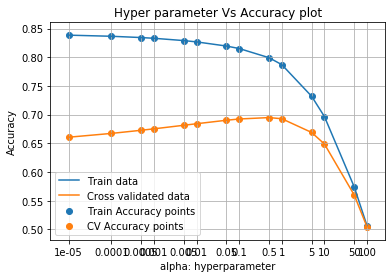

In [18]:
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

Params = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(MultinomialNB(),Params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_Train,y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)
#results
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

log_values=[]
for i in alpha:
    log_values.append(math.log(i))
    

plt.plot(log_values, train_auc, label='Train data')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_values, cv_auc, label='Cross validated data')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.xticks(log_values,alpha)



plt.scatter(log_values, train_auc, label='Train Accuracy points')
plt.scatter(log_values, cv_auc, label='CV Accuracy points')
#plt.xticks(list(range(len(alpha))),alpha)

plt.xticks(log_values,alpha)

plt.legend()

plt.xlabel("alpha: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()

#print(alpha)


we take alpha value=0.5, since for that there isn't maximum deviation between train score and test score

using class prior/ngram range results in training score > (85-90)

### Testing with best alpha

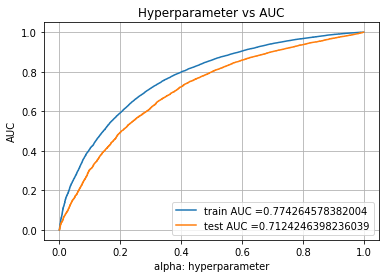

In [19]:
from sklearn.metrics import roc_curve, auc


NB = MultinomialNB(alpha=0.5)
NB.fit(X_Train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NB, X_Train)    
y_test_pred = batch_predict(NB, X_Test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter vs AUC")
plt.grid()
plt.show()

### Calculating confusion matrix

In [20]:
#threshold and predict function referred from reference notebook
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions



In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))

cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

the maximum value of tpr*(1-fpr) 0.501611234690136 for threshold 0.853


Text(0.5, 1, 'Confusion Matrix on Training Data')

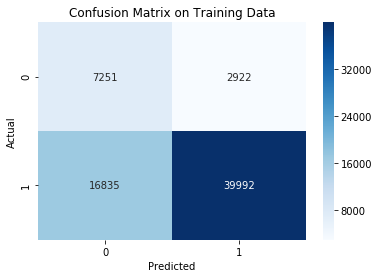

In [26]:
sns.heatmap(cm_train, annot=True, fmt='d',cmap='Blues')
 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix on Training Data")


Text(0.5, 1, 'Confusion Matrix on Testing Data')

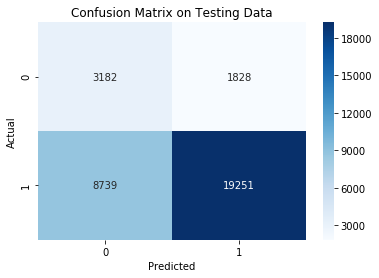

In [28]:
sns.heatmap(cm_test, annot=True, fmt='d',cmap='Blues')
 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix on Testing Data")


### 1.5.2 Encoding categorical feature using TF-IDF Vectorizer

In [29]:
x_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
89283,ca,ms,grades_prek_2,1,literacy_language math_science,literature_writing mathematics,our computer lab dynamic learning enviroment s...,11.85
83269,wa,ms,grades_6_8,32,warmth care_hunger,warmth care_hunger,sitting classroom nearly thirty students easy ...,84.06
60118,co,ms,grades_9_12,6,literacy_language,literacy,i teach alternative school small suburb denver...,234.06
32938,va,mrs,grades_prek_2,1,health_sports,health_wellness nutritioneducation,hi i teach 24 culturally diverse 1st grade stu...,325.46
56677,sc,mr,grades_3_5,6,math_science,appliedsciences mathematics,i teach small rural school my students come ma...,345.29


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer(min_df=10,ngram_range=(1,1),stop_words='english')
TFIDF.fit(x_train['essay'].values)

x_train_tfidf = TFIDF.transform(x_train['essay'].values)
x_test_tfidf = TFIDF.transform(x_test['essay'].values)



In [31]:
l=TFIDF.get_feature_names()
print(len(l))
print(len(k))

13508
101


In [32]:
j=l+k

In [33]:
print(x_train_tfidf.shape,y_train.shape)
print(x_test_tfidf.shape,y_test.shape)


(67000, 13508) (67000,)
(33000, 13508) (33000,)


In [34]:
print(len(j))

13609


### Stacking Numerical features with tfidf essay

All other features were taken as it is from previous set

In [35]:
from scipy.sparse import hstack

X_Train = hstack((x_train_tfidf,
                  x_train_state_ohe,
                  x_train_teacher_prefix_ohe,
                  x_train_project_grade_category_ohe,
                  x_train_clean_categories_ohe,
                  x_train_clean_subcategories_ohe,
                  x_train_price_normalized,
                  x_train_teacher_number_of_previously_posted_projects_normalized)).tocsr()

X_Test = hstack((x_test_tfidf,
                  x_test_state_ohe,
                  x_test_teacher_prefix_ohe,
                  x_test_project_grade_category_ohe,
                  x_test_clean_categories_ohe,
                  x_test_clean_subcategories_ohe,
                  x_test_price_normalized,
                  x_test_teacher_number_of_previously_posted_projects_normalized)).tocsr()

In [36]:
print(X_Train.shape)

(67000, 13609)


### 1.5.3 Training the model with TFIDF(Essay) and other features

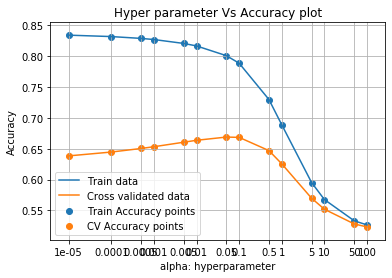

In [37]:
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

Params = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(MultinomialNB(),Params,cv=3,scoring='roc_auc',return_train_score=True)
clf.fit(X_Train,y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)
#results
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

log_values=[]
for i in alpha:
    log_values.append(math.log(i))
    

plt.plot(log_values, train_auc, label='Train data')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_values, cv_auc, label='Cross validated data')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.xticks(log_values,alpha)



plt.scatter(log_values, train_auc, label='Train Accuracy points')
plt.scatter(log_values, cv_auc, label='CV Accuracy points')
#plt.xticks(list(range(len(alpha))),alpha)

plt.xticks(log_values,alpha)

plt.legend()

plt.xlabel("alpha: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()

#print(alpha)


best value of alpha = 0.5/1

### Testing with best alpha

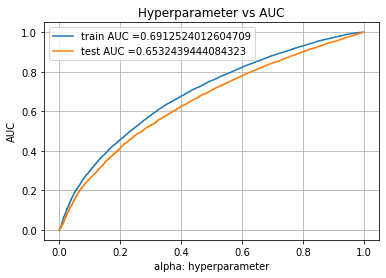

In [38]:
NB = MultinomialNB(alpha=1)
NB.fit(X_Train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(NB, X_Train)    
y_test_pred = batch_predict(NB, X_Test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter vs AUC")
plt.grid()
plt.show()

### Calculating Confusion Matrix

In [39]:
import seaborn as sns
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

the maximum value of tpr*(1-fpr) 0.4115955477965202 for threshold 0.883
Train confusion matrix


Text(0.5, 1, 'Confusion Matrix on Training data (tf-idf)')

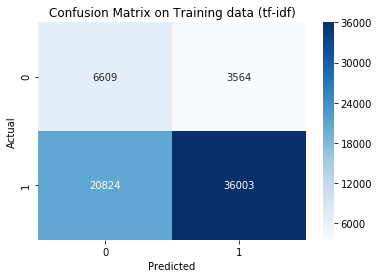

In [40]:
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(cm_train,annot=True,fmt="d",cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix on Training data (tf-idf)')

Text(0.5, 1, 'Confusion Matrix on Testing data (tf-idf)')

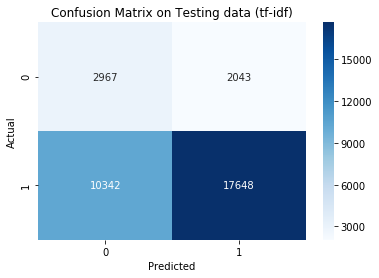

In [41]:
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_test,annot=True,fmt="d",cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix on Testing data (tf-idf)')

In [42]:
nb=MultinomialNB()
nb.fit(X_Train,y_train)

pos_class = (-nb.feature_log_prob_[0,:]).argsort()[:20] #sorting in descending order and taking top20 features
neg_class = (-nb.feature_log_prob_[1,:]).argsort()[:20]

#print(pos_class)
#print(neg_class)
print('Top 20 features in positive class')
print(np.take(j,pos_class)) #referred from stackoverflow
print('='*100)
print('Top 20 features in negative class')
print(np.take(j,neg_class))


Top 20 features in positive class
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8'
 'specialneeds' 'specialneeds' 'ca' 'students' 'health_sports'
 'appliedlearning' 'appliedsciences' 'grades_9_12' 'mr' 'music_arts']
Top 20 features in negative class
['mrs' 'literacy_language' 'grades_prek_2' 'math_science' 'ms'
 'grades_3_5' 'literacy' 'mathematics' 'literature_writing' 'grades_6_8'
 'ca' 'students' 'health_sports' 'specialneeds' 'specialneeds'
 'appliedlearning' 'grades_9_12' 'health_wellness' 'appliedsciences' 'mr']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [44]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Vectorizer', 'Hyperparameter','TrainAuc','TestAUC']
x.add_row(["BOW",0.5,0.77,0.71])
x.add_row(["TFIDF",1,0.69,0.65])
print(x)

+------------+----------------+----------+---------+
| Vectorizer | Hyperparameter | TrainAuc | TestAUC |
+------------+----------------+----------+---------+
|    BOW     |      0.5       |   0.77   |   0.71  |
|   TFIDF    |       1        |   0.69   |   0.65  |
+------------+----------------+----------+---------+
